# Goeduhub | Task - 14 ( KNN ) | Reg - ID : GO_STP_2134 |  
---

### Practice KNN - We have a dataset that contains multiple user's information through the social network who 
   
### are interested in buying SUV Car or not  
---
  
### You Can download data set here  

https://drive.google.com/file/d/1AyN2ACOsNk4_YdpZVHpODGAb3YQh5LHp/view

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv(r'E:\Goeduhub_ML_Program_May_20\data\User_Data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Checking for Null values

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

## Univariant analysis

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

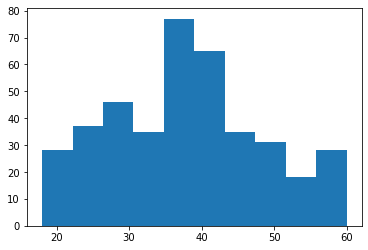

In [12]:
plt.hist(df['Age'])

In [19]:
import warnings
warnings.filterwarnings('ignore')

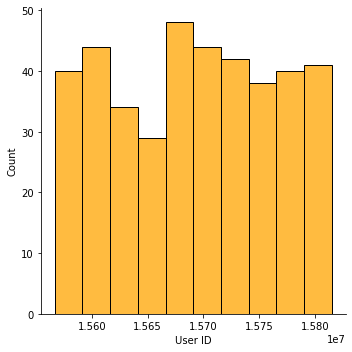

In [23]:
sns.displot(df['User ID'],color='orange')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

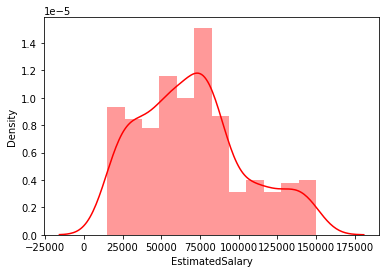

In [24]:
sns.distplot(df['EstimatedSalary'],color='red')

In [46]:
df['normal_est_sal']=np.log(df['EstimatedSalary'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

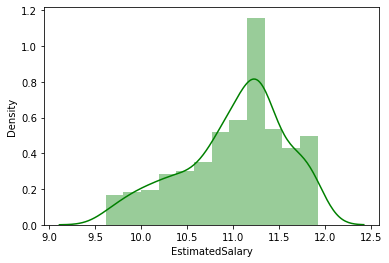

In [31]:
sns.distplot(np.log(df['EstimatedSalary']),color='green')

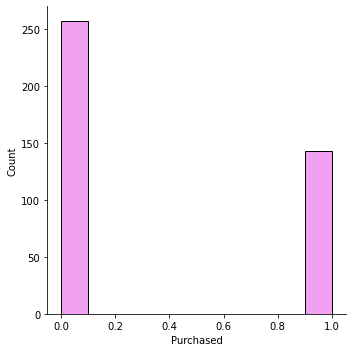

In [30]:
sns.displot(df['Purchased'],color='violet')

## Bivariant analysis

<AxesSubplot:xlabel='Purchased', ylabel='count'>

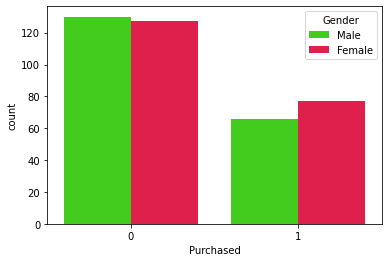

In [38]:
sns.countplot('Purchased',data=df,hue='Gender',palette='prism')

<AxesSubplot:xlabel='Purchased', ylabel='User ID'>

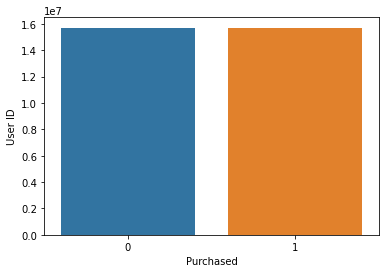

In [49]:
sns.barplot(df['Purchased'],df['User ID'])

<AxesSubplot:xlabel='User ID', ylabel='Age'>

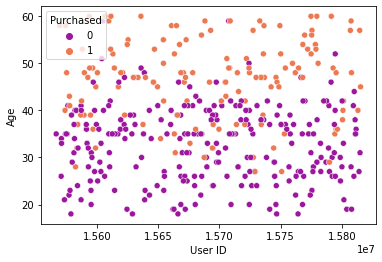

In [59]:
sns.scatterplot(df['User ID'],df['Age'],data=df,hue="Purchased",palette='plasma')

<AxesSubplot:xlabel='Purchased', ylabel='Gender'>

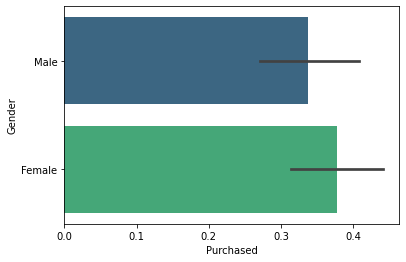

In [58]:
sns.barplot(df['Purchased'],df['Gender'],palette='viridis')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='User ID'>

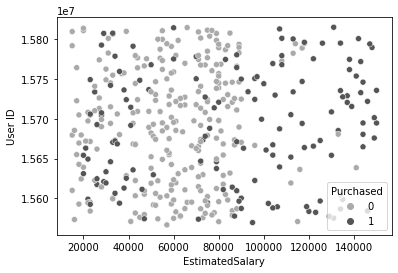

In [62]:
sns.scatterplot(df['EstimatedSalary'],df['User ID'],data=df,hue='Purchased',palette='binary')

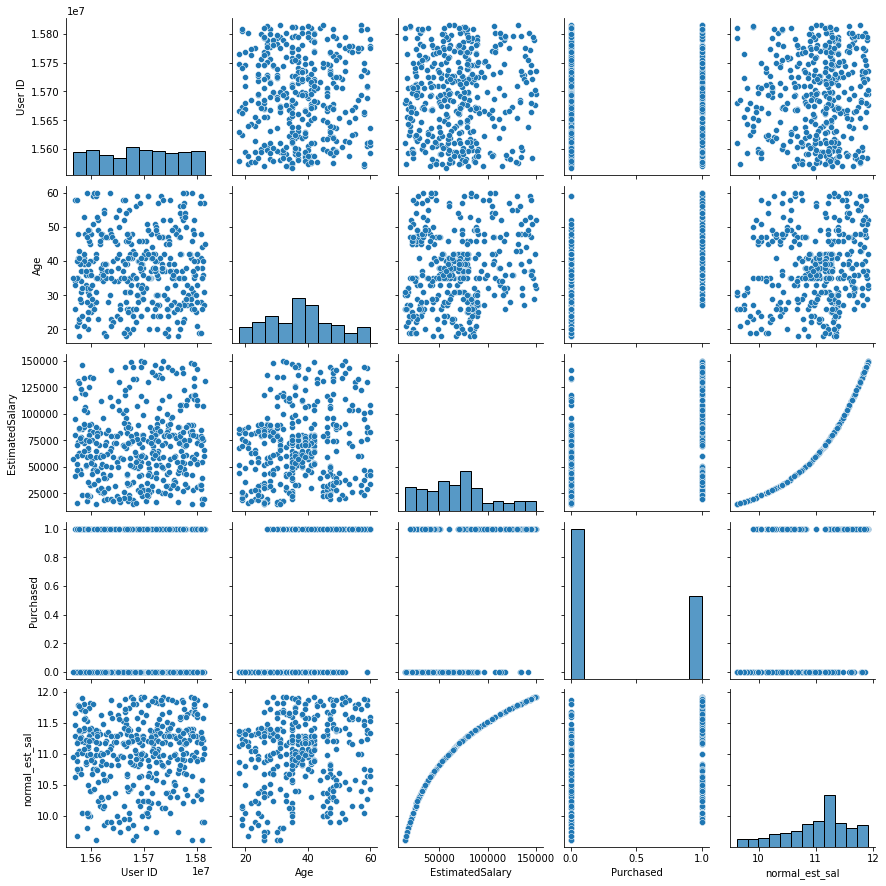

In [51]:
sns.pairplot(df)

<AxesSubplot:>

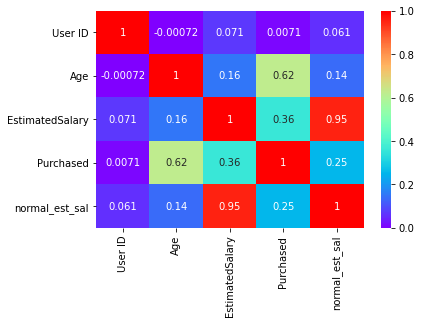

In [67]:
sns.heatmap(df.corr(),cmap='rainbow',annot=True)

In [68]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,normal_est_sal
0,15624510,Male,19,19000,0,9.852194
1,15810944,Male,35,20000,0,9.903488
2,15668575,Female,26,43000,0,10.668955
3,15603246,Female,27,57000,0,10.950807
4,15804002,Male,19,76000,0,11.238489


## Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df.Gender=le.fit_transform(df.Gender)

df.Gender.head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int32

In [70]:
x=df.drop(['Purchased','User ID','EstimatedSalary'],axis='columns')

print(x)

y=df['Purchased']

print(y)

     Gender  Age  normal_est_sal
0         1   19        9.852194
1         1   35        9.903488
2         0   26       10.668955
3         0   27       10.950807
4         1   19       11.238489
..      ...  ...             ...
395       0   46       10.621327
396       1   51       10.043249
397       0   50        9.903488
398       1   36       10.404263
399       0   49       10.491274

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [73]:
x['Age']=np.log(df['Age'])

In [74]:
x.head()

,Gender,Age,normal_est_sal
0,1,1.079918,9.852194
1,1,1.268453,9.903488
2,0,1.181143,10.668955
3,0,1.192660,10.950807
4,1,1.079918,11.238489


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x.drop('Gender',axis=1,inplace=True)

x=scaler.fit_transform(x)

print(x)


[[-2.34788203 -2.09541438]
 [-0.06905994 -2.00299603]
 [-1.12437545 -0.62380457]
 [-0.98516955 -0.11597566]
 [-2.34788203  0.40235919]
 [-0.98516955 -0.08463987]
 [-0.98516955  0.58268584]
 [-0.37761704  1.62738121]
 [-1.27076091 -1.10071776]
 [-0.06905994  0.12066066]
 [-1.12437545  0.49477754]
 [-1.12437545 -0.28139108]
 [-2.13913437  0.62508221]
 [-0.37761704 -2.19283068]
 [-2.5718928   0.53926777]
 [-0.72590442  0.49477754]
 [ 0.8937741  -1.60094429]
 [ 0.75648168 -1.53027787]
 [ 0.826069   -1.39675288]
 [ 0.95968839 -1.33352665]
 [ 0.75648168 -1.8312697 ]
 [ 0.8937741  -0.38845799]
 [ 0.95968839 -0.70961902]
 [ 0.75648168 -1.8312697 ]
 [ 0.826069   -1.75117816]
 [ 0.8937741  -2.00299603]
 [ 1.02389697 -1.39675288]
 [ 0.8937741  -1.27244409]
 [-0.72590442 -0.62380457]
 [-0.48885334 -2.19283068]
 [-0.48885334  0.35430933]
 [-0.98516955  1.46404355]
 [-1.9438643  -2.40504777]
 [-0.8525268  -0.58238291]
 [-0.98516955  0.70699462]
 [-0.06905994 -1.46227875]
 [-0.27077216 -1.39675288]
 

## Detecting outliers

In [77]:
max_threshold=df['Age'].quantile(0.95)
print(max_threshold)

min_threshold=df['Age'].quantile(0.05)
print(min_threshold)

df[df['Age']>max_threshold]
df[df['Age']<min_threshold]



4.043920854970143
3.044522437723423


,User ID,Gender,Age,EstimatedSalary,Purchased,normal_est_sal
0,15624510,1,2.944439,19000,0,9.852194
4,15804002,1,2.944439,76000,0,11.238489
12,15746139,1,2.995732,86000,0,11.362103
14,15628972,1,2.890372,82000,0,11.314475
51,15764195,0,2.890372,44000,0,10.691945
72,15595228,0,2.995732,23000,0,10.043249
76,15746737,1,2.890372,52000,0,10.858999
82,15709476,1,2.995732,49000,0,10.799576
104,15672091,0,2.944439,21000,0,9.952278
136,15668504,0,2.995732,82000,0,11.314475


## Removing Outliers


In [78]:
df[(df['Age']<max_threshold)&(df['Age']>min_threshold)]

,User ID,Gender,Age,EstimatedSalary,Purchased,normal_est_sal
1,15810944,1,3.555348,20000,0,9.903488
2,15668575,0,3.258097,43000,0,10.668955
3,15603246,0,3.295837,57000,0,10.950807
5,15728773,1,3.295837,58000,0,10.968198
6,15598044,0,3.295837,84000,0,11.338572
...,...,...,...,...,...,...
395,15691863,0,3.828641,41000,1,10.621327
396,15706071,1,3.931826,23000,1,10.043249
397,15654296,0,3.912023,20000,1,9.903488
398,15755018,1,3.583519,33000,0,10.404263


## Splitting Data into Train and Test


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

##  KNN Classifier Model


In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
ypred=KNN.predict(x_test)

In [84]:
ypred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [85]:
y_test

332    0
111    0
352    1
205    0
56     0
      ..
304    0
187    0
166    0
64     0
27     1
Name: Purchased, Length: 80, dtype: int64

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,ypred)
acc=accuracy_score(y_test,ypred)

## Confusion matrix

<AxesSubplot:>

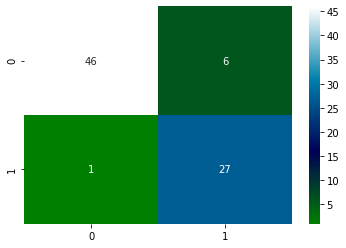

In [88]:
sns.heatmap(cm,annot=True,cmap='ocean')

## Accuracy

In [90]:
print(acc*100)

91.25


## Classification Report

In [91]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,ypred)

In [92]:
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        52
           1       0.82      0.96      0.89        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

